/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - loss: 573.4088 - val_loss: 86.5137
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 32.6929 - val_loss: 4.0665
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.8425 - val_loss: 1.3563
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.2630 - val_loss: 0.8841
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.9252 - val_loss: 0.7181
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.8759 - val_loss: 0.6817
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.7547 - val_loss: 0.6813
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7099 - val_loss: 1.2606
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8555 - val_loss: 0.5832
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7541 - val_loss: 0.5498
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6479 - val_loss: 0.7439
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.

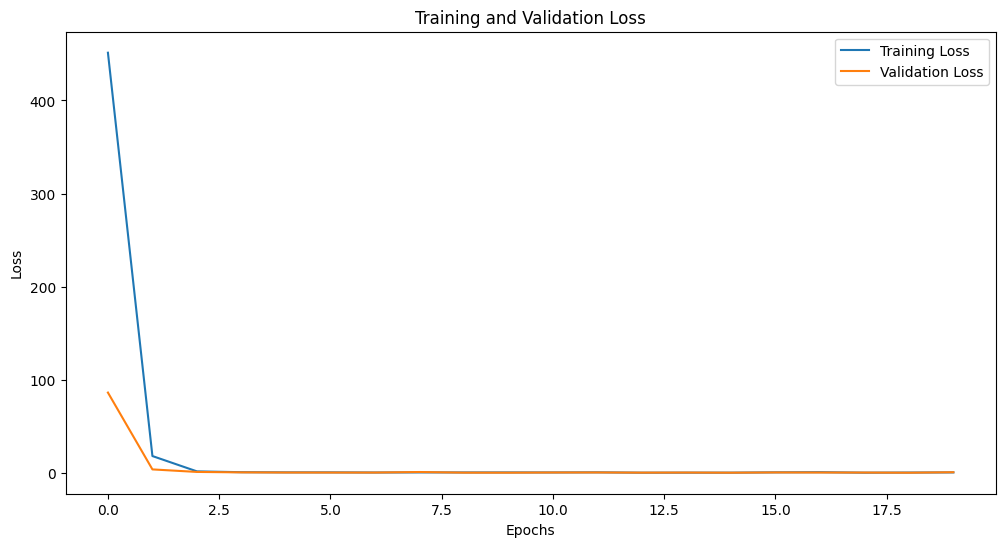

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


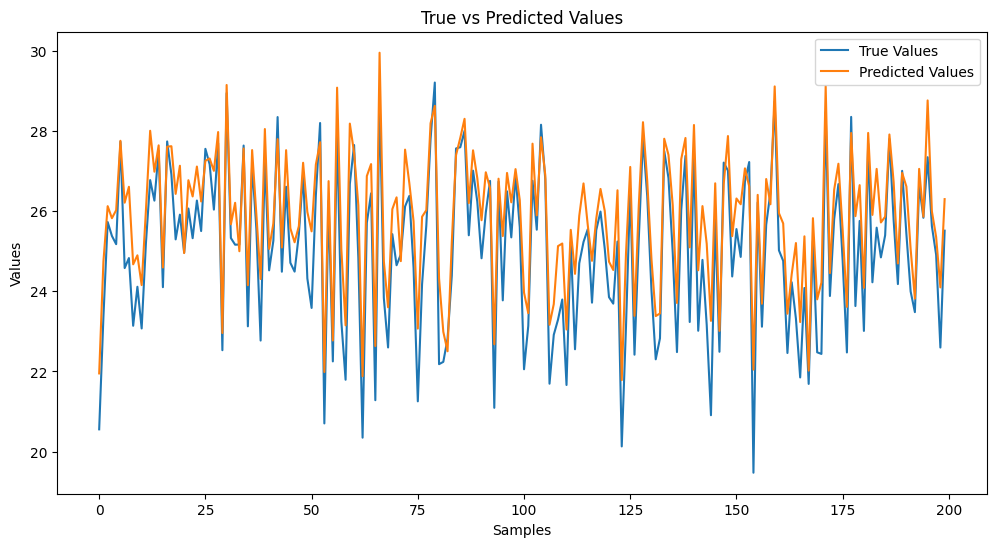

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Generate synthetic data
def generate_data(seq_length=50, num_sequences=1000):
    X = np.random.rand(num_sequences, seq_length, 1)
    y = np.sum(X, axis=1)
    return X, y

# Generate data
X, y = generate_data()

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(X.shape[1], X.shape[2]), activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions
y_pred = model.predict(X_test)

# Plot predictions vs true values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='True Values')
plt.plot(y_pred, label='Predicted Values')
plt.title('True vs Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()
plt.show()
